# DEPLOY BOTH TRAINED MODELS with TENSORFLOW SERVING

## SAVE THE TRAINED MODEL FOR DEPLOYMENT

![alt text](https://drive.google.com/uc?id=1bjjMMF3qorxHwW2DWRugsrkf9YKRIaf3)

![alt text](https://drive.google.com/uc?id=1RltAICf4OkErndMnGDC_FB7wh7zuDDWJ)

![alt text](https://drive.google.com/uc?id=1p686eR8SxMLkKdS60hY9i1l_G6hXrnND)

- We now need to save our trained model and it has to be saved in a SavedModel format.
- The model will have a version number and will be saved in a structured directory 
- tf.saved_model.save is a function used to build a saved model that is suitable for serving using Tensorflow Serving. 
- After the model is saved, we can now use TensorFlow Serving to start making inference requests using a specific version of our trained model "servable".
- Use SavedModel to save and load your model—variables, the graph, and the graph's metadata. 
          
- Check this out for more information: 
https://www.tensorflow.org/guide/saved_model

In [102]:
import json
import tensorflow.keras.backend as K

def deploy(directory, model):
    MODEL_DIR = directory
    version = 1 

    # Let's join the temp model directory with our chosen version number 
    # The expected result will be = '\tmp\version number'
    export_path = os.path.join(MODEL_DIR, str(version))
    print('export_path = {}\n'.format(export_path))

    # Let's save the model using saved_model.save
    # If the directory already exists, we will remove it using '!rm' 
    # rm removes each file specified on the command line. 

    if os.path.isdir(export_path):
        print('\nAlready saved a model, cleaning up\n')
        !rm -r {export_path}

    tf.saved_model.save(model, export_path)

    os.environ["MODEL_DIR"] = MODEL_DIR

##  SERVE THE MODEL USING TENSORFLOW SERVING

In [103]:
# Let's add tensorflow-model-server package to our list of packages 
!echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | apt-key add -
!apt update

'tee' is not recognized as an internal or external command,
operable program or batch file.
'apt' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
# Let's install tensorflow model server
!apt-get install tensorflow-model-server

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  tensorflow-model-server
0 upgraded, 1 newly installed, 0 to remove and 48 not upgraded.
Need to get 187 MB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://storage.googleapis.com/tensorflow-serving-apt stable/tensorflow-model-server amd64 tensorflow-model-server all 2.2.0 [187 MB]
Fetched 187 MB in 3s (66.9 MB/s)
Selecting previously unselected package tensorflow-model-server.
(Reading database ... 144465 files and directories currently installed.)
Preparing to unpack .../tensorflow-model-server_2.2.0_all.deb ...
Unpacking tensorflow-model-server (2.2.0) ...
Setting up tensorflow-model-server (2.2.0) ...


## Let's run TensorFlow serving

- We will load our model and start making inferences (predictions) based on it.
- There are some important parameters:

  - rest_api_port: The port that you'll use for REST requests.
  - model_name: You'll use this in the URL of REST requests. You can choose any name
  - model_base_path: This is the path to the directory where you've saved your model.
  
- For more information regarding REST, check this out: 
https://www.codecademy.com/articles/what-is-rest
- REST is a revival of HTTP in which http commands have semantic meaning. 

In [ ]:
deploy('/model', model_1_facialKeyPoints)

export_path = /model/1

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /model/1/assets


In [ ]:
%%bash --bg 
nohup tensorflow_model_server \
  --rest_api_port=4500 \
  --model_name=keypoint_model \
  --model_base_path="${MODEL_DIR}" >server.log 2>&1

Starting job # 0 in a separate thread.


In [ ]:
!tail server.log

2020-07-15 02:07:48.885759: I external/org_tensorflow/tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2020-07-15 02:07:48.954784: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:234] Restoring SavedModel bundle.
2020-07-15 02:07:49.188484: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:183] Running initialization op on SavedModel bundle at path: /model/1
2020-07-15 02:07:49.308609: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:364] SavedModel load for tags { serve }; Status: success: OK. Took 445893 microseconds.
2020-07-15 02:07:49.320568: I tensorflow_serving/servables/tensorflow/saved_model_warmup.cc:105] No warmup data file found at /model/1/assets.extra/tf_serving_warmup_requests
2020-07-15 02:07:49.320985: I tensorflow_serving/core/loader_harness.cc:87] Successfully loaded servable version {name: keypoint_model version: 1}
2020-07-15 02:07:4

In [ ]:
deploy('/model1', model_2_emotion)

export_path = /model1/1

INFO:tensorflow:Assets written to: /model1/1/assets


In [ ]:
%%bash --bg 
nohup tensorflow_model_server \
  --rest_api_port=4000 \
  --model_name=emotion_model \
  --model_base_path="${MODEL_DIR}" >server.log 2>&1

Starting job # 2 in a separate thread.


In [ ]:
!tail server.log

2020-07-15 02:08:52.183551: I external/org_tensorflow/tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2020-07-15 02:08:52.275232: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:234] Restoring SavedModel bundle.
2020-07-15 02:08:52.450458: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:183] Running initialization op on SavedModel bundle at path: /model1/1
2020-07-15 02:08:52.541199: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:364] SavedModel load for tags { serve }; Status: success: OK. Took 383900 microseconds.
2020-07-15 02:08:52.552074: I tensorflow_serving/servables/tensorflow/saved_model_warmup.cc:105] No warmup data file found at /model1/1/assets.extra/tf_serving_warmup_requests
2020-07-15 02:08:52.552469: I tensorflow_serving/core/loader_harness.cc:87] Successfully loaded servable version {name: emotion_model version: 1}
2020-07-15 02:08:

- **Congratulations! now we have successfully loaded a servable version of our model {name: keypoint_model version: 1}** 
- **Congratulations! now we have successfully loaded a servable version of our model {name: emotion_model version: 1}** 

# MAKE REQUESTS TO MODEL IN TENSORFLOW SERVING

In [ ]:
import json

# Let's create a JSON object and make 3 inference requests
data = json.dumps({"signature_name": "serving_default", "instances": X_test[0:3].tolist()})
print('Data: {} ... {}'.format(data[:50], data[len(data)-52:]))

Data: {"signature_name": "serving_default", "instances": ... 172231674194], [1.0], [1.0], [1.0], [1.0], [1.0]]]]}


In [ ]:
!pip install -q requests

In [ ]:
import requests

# Function to make predictions from deployed models
def response(data):
  headers = {"content-type": "application/json"}
  json_response = requests.post('http://localhost:4500/v1/models/keypoint_model/versions/1:predict', data=data, headers=headers, verify = False)
  df_predict = json.loads(json_response.text)['predictions']
  json_response = requests.post('http://localhost:4000/v1/models/emotion_model/versions/1:predict', data=data, headers=headers, verify = False)
  df_emotion = np.argmax(json.loads(json_response.text)['predictions'], axis = 1)
  
  # Reshaping array from (856,) to (856,1)
  df_emotion = np.expand_dims(df_emotion, axis = 1)

  # Converting the predictions into a dataframe
  df_predict= pd.DataFrame(df_predict, columns = columns)

  # Adding emotion into the predicted dataframe
  df_predict['emotion'] = df_emotion

  return df_predict

In [ ]:
# making prediction
df_predict = response(data)

In [ ]:
df_predict

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,emotion
0,67.191750,40.315731,31.159002,31.321928,60.391983,39.892193,74.364342,42.570709,37.868263,34.352783,23.629301,29.943869,59.895458,33.299038,81.082809,36.535580,43.978065,29.244591,19.456795,22.203642,44.837772,62.827095,58.739151,75.648400,24.131174,67.681976,41.411930,73.808220,40.205318,81.007812,3
1,66.625709,36.723312,30.051167,38.728249,60.393360,37.676323,73.304400,37.299122,36.704311,38.842911,23.373636,40.162575,57.475433,28.200853,79.064484,29.026730,38.383114,29.590614,16.397839,33.378326,50.429455,52.355823,65.993294,75.481377,37.287731,77.778694,51.307591,68.278862,52.165241,86.067841,3
2,66.494300,35.461330,30.653955,37.287907,59.479546,36.712400,72.856781,35.768440,37.003429,37.702095,23.139545,38.525375,56.323830,30.579756,78.116653,29.656347,38.822803,31.503185,16.949095,34.199300,49.486858,58.430035,65.250351,72.418633,34.524292,74.269890,49.820766,72.843552,50.125488,78.823173,3


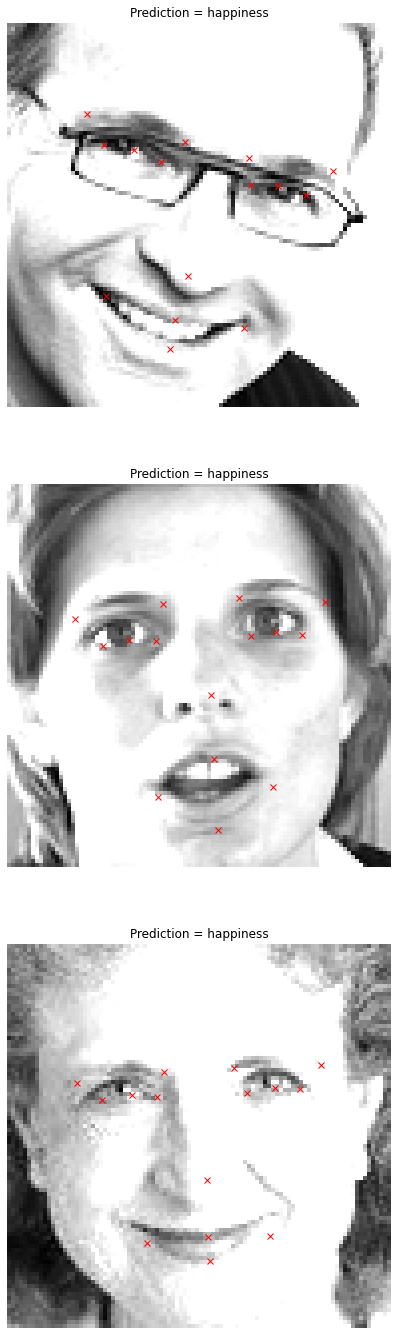

In [ ]:
# Plotting the test images and their predicted keypoints and emotions

fig, axes = plt.subplots(3, 1, figsize = (24, 24))
axes = axes.ravel()

for i in range(3):

    axes[i].imshow(X_test[i].squeeze(),cmap='gray')
    axes[i].set_title('Prediction = {}'.format(label_to_text[df_predict['emotion'][i]]))
    axes[i].axis('off')
    for j in range(1,31,2):
            axes[i].plot(df_predict.loc[i][j-1], df_predict.loc[i][j], 'rx')
            

# EXCELLENT JOB! NOW YOU HAVE A SOLID KNOWLEDGE OF EMOTION AI! YOU SHOULD BE SUPER PROUD OF YOUR NEWLY ACQUIRED SKILLS :)

# ACTIVATION FUNCTIONS

![alt text](https://drive.google.com/uc?id=1G8aJvO6IFxxd7dAdVB1tylWGNcSUM3R4)

![alt text](https://drive.google.com/uc?id=1d4HfwWTawWwpiXYfrADRUGLc0yfJNzoz)

![alt text](https://drive.google.com/uc?id=142wHzaUyjv8185BZS-BisyjQALDOZhSX)

Great Resource by Aravind Pai: https://www.analyticsvidhya.com/blog/2020/02/cnn-vs-rnn-vs-mlp-analyzing-3-types-of-neural-networks-in-deep-learning/

Great Resource by Jason Brownlee: https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/

https://towardsdatascience.com/understanding-and-coding-a-resnet-in-keras-446d7ff84d33

# Well Done!